In [6]:
import numpy as np
import pandas as pd

## installing the packages

In [1]:
# pip install rpy2 to be able to run the following cells
# pip install rpy2 
%load_ext rpy2.ipython

C:\Users\Test\anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [ ]:
%%R
# install the packges if this the first time running R on jupiter
install.packages("plyr", repos='http://cran.us.r-project.org')
install.packages("tidyverse", repos='http://cran.us.r-project.org')
install.packages("effects", repos='http://cran.us.r-project.org')

In [2]:
%%R

# load the librarys
library(plyr)
library(tidyverse)
library(effects)

R[write to console]: -- Attaching packages --------------------------------------- tidyverse 1.3.1 --

R[write to console]: v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

R[write to console]: -- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::arrange()   masks plyr::arrange()
x purrr::compact()   masks plyr::compact()
x dplyr::count()     masks plyr::count()
x dplyr::failwith()  masks plyr::failwith()
x dplyr::filter()    masks stats::filter()
x dplyr::id()        masks plyr::id()
x dplyr::lag()       masks stats::lag()
x dplyr::mutate()    masks plyr::mutate()
x dplyr::rename()    masks plyr::rename()
x dplyr::summarise() masks plyr::summarise()
x dplyr::summarize() masks plyr::summarize()

R[write to console]: Loading required package: carData

R[write to console]: lattice theme set by effectsTheme()
See ?effectsTheme for details.



## Set the correct working directory and import the files

In [ ]:
# set the correct working directory where the 6 csv files are stored
%%R 
setwd("Desktop/Test ALgorithems/")

In [11]:
%%R

# importing all the files
X5_clicks_downsampled = read.table("5_clicks_downsampled.csv", header = T, sep=',')
X10_clicks_downsampled = read.table("10_clicks_downsampled.csv", header = T, sep=',')
X15_clicks_downsampled = read.table("15_clicks_downsampled.csv", header = T, sep=',')
X5_clicks_no_downsampled = read.table("5_clicks_no_downsample.csv", header = T, sep=',')
X10_clicks_no_downsampled = read.table("10_clicks_no_downsample.csv", header = T, sep=',')
X15_clicks_no_downsampled = read.table("15_clicks_no_downsampled.csv", header = T, sep=',')

## Cleaning and formatting the files

In [12]:
%%R

# cleaning and formatting the files

# the 5 clicks buy
X5_clicks_downsampled$X <- NULL
X5_clicks_downsampled$num_of_clicks <- "5_clicks"
colnames(X5_clicks_downsampled)[1] <- "Predicted_Labels"
colnames(X5_clicks_downsampled)[2] <- "True_Labels"
colnames(X5_clicks_downsampled)[3] <- "Accurate"
colnames(X5_clicks_downsampled)[4] <-  "Session_Length"

# the 10 clicks buy
X10_clicks_downsampled$X <- NULL
X10_clicks_downsampled$num_of_clicks <- "10_clicks"
colnames(X10_clicks_downsampled)[1] <- "Predicted_Labels"
colnames(X10_clicks_downsampled)[2] <- "True_Labels"
colnames(X10_clicks_downsampled)[3] <- "Accurate"
colnames(X10_clicks_downsampled)[4] <-  "Session_Length"

# the 15 clicks buy
X15_clicks_downsampled$X <- NULL
X15_clicks_downsampled$num_of_clicks <- "15_clicks"
colnames(X15_clicks_downsampled)[1] <- "Predicted_Labels"
colnames(X15_clicks_downsampled)[2] <- "True_Labels"
colnames(X15_clicks_downsampled)[3] <- "Accurate"
colnames(X15_clicks_downsampled)[4] <-  "Session_Length"

# the 5 clicks no buy
X5_clicks_no_downsampled$X <- NULL
X5_clicks_no_downsampled$num_of_clicks <- "5_clicks"
colnames(X5_clicks_no_downsampled)[1] <- "Predicted_Labels"
colnames(X5_clicks_no_downsampled)[2] <- "True_Labels"
colnames(X5_clicks_no_downsampled)[3] <- "Accurate"
colnames(X5_clicks_no_downsampled)[4] <-  "Session_Length"

# the 10 clicks no buy
X10_clicks_no_downsampled$X <- NULL
X10_clicks_no_downsampled$num_of_clicks <- "10_clicks"
colnames(X10_clicks_no_downsampled)[1] <- "Predicted_Labels"
colnames(X10_clicks_no_downsampled)[2] <- "True_Labels"
colnames(X10_clicks_no_downsampled)[3] <- "Accurate"
colnames(X10_clicks_no_downsampled)[4] <-  "Session_Length"

# the 15 clicks no buy
X15_clicks_no_downsampled$X <- NULL
X15_clicks_no_downsampled$num_of_clicks <- "15_clicks"
colnames(X15_clicks_no_downsampled)[1] <- "Predicted_Labels"
colnames(X15_clicks_no_downsampled)[2] <- "True_Labels"
colnames(X15_clicks_no_downsampled)[3] <- "Accurate"
colnames(X15_clicks_no_downsampled)[4] <-  "Session_Length"

## Combing the data frames

In [15]:
%%R

# combine the 6 data frames to two buy and no_buy data frames
buy <- rbind(X5_clicks_downsampled, X10_clicks_downsampled, X15_clicks_downsampled)
no_buy <- rbind(X5_clicks_no_downsampled, X10_clicks_no_downsampled, X15_clicks_no_downsampled)

head(buy)

  Predicted_Labels True_Labels Accurate Session_Length num_of_clicks
1                0           0        1             14      5_clicks
2                1           0        0             10      5_clicks
3                0           0        1             15      5_clicks
4                0           0        1             12      5_clicks
5                1           0        0             21      5_clicks
6                1           0        0             10      5_clicks


## Fitting the data freames in a logistic regression

In [18]:
%%R

# test the logistic regression on the buy and no_buy data frames
buy_glm.fit <- glm(Accurate ~ True_Labels + Session_Length + num_of_clicks, data = buy, family = binomial)
no_buy_glm.fit <- glm(Accurate ~ True_Labels + Session_Length + num_of_clicks, data = no_buy, family = binomial)

In [19]:
%%R

# summerizing the result for the buy group
summary(buy_glm.fit)


Call:
glm(formula = Accurate ~ True_Labels + Session_Length + num_of_clicks, 
    family = binomial, data = buy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5321  -0.5067  -0.4600   0.7443   2.3131  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -1.8118677  0.0334276 -54.203   <2e-16 ***
True_Labels             3.2592636  0.0321876 101.258   <2e-16 ***
Session_Length         -0.0117396  0.0009115 -12.880   <2e-16 ***
num_of_clicks15_clicks -0.0406162  0.0367870  -1.104     0.27    
num_of_clicks5_clicks   1.7874452  0.0303533  58.888   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 64581  on 47785  degrees of freedom
Residual deviance: 44899  on 47781  degrees of freedom
AIC: 44909

Number of Fisher Scoring iterations: 5



In [20]:
%%R

# summerizing the result for the on_buy group
summary(no_buy_glm.fit)


Call:
glm(formula = Accurate ~ True_Labels + Session_Length + num_of_clicks, 
    family = binomial, data = no_buy)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9376  -1.1357   0.5791   0.8258   1.6590  

Coefficients:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             0.9141244  0.0263508  34.691   <2e-16 ***
True_Labels            -1.7908439  0.0232323 -77.084   <2e-16 ***
Session_Length         -0.0014782  0.0007739  -1.910   0.0561 .  
num_of_clicks15_clicks  0.0425398  0.0278862   1.525   0.1271    
num_of_clicks5_clicks   0.8073649  0.0252379  31.990   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 60618  on 47785  degrees of freedom
Residual deviance: 52973  on 47781  degrees of freedom
AIC: 52983

Number of Fisher Scoring iterations: 4



## Making the plots

In [33]:
%%R

# create the buy_plot 
buy_glm.fit.effects = as.data.frame(
  Effect(c("True_Labels", "Session_Length", "num_of_clicks"), buy_glm.fit,
         xlevels = list(Session_Length=sort(unique(buy$Session_Length))), 
         confidence.level=.99))

buy_glm.fit.effects$num_of_clicks =factor(buy_glm.fit.effects$num_of_clicks, 
                                      levels = c("5_clicks", "10_clicks", "15_clicks"))


buy_plot <- ggplot(data = buy_glm.fit.effects, aes(Session_Length, fit, color=num_of_clicks, fill=num_of_clicks)) +
                    geom_smooth() +
                    labs(y = 'Accuracy', x = "sequence length") +
                    ggtitle("buy_plot = uracy as a function of length, for diffrent numbers of clicks") +
                    scale_y_continuous(limits = c(0,1)) + 
                    scale_x_continuous(limits = c(5, 160)) +
                    theme(legend.direction = "horizontal", legend.position = "bottom", legend.box = "horizontal", legend.key.height = unit(0.5, "cm"), legend.key.width = unit(1, "cm"))

In [34]:
%%R

# create the no_buy_plot 
no_buy_glm.fit.effects = as.data.frame(
  Effect(c("True_Labels", "Session_Length", "num_of_clicks"), no_buy_glm.fit,
         xlevels = list(Session_Length=sort(unique(no_buy$Session_Length))), 
         confidence.level=.99))

no_buy_glm.fit.effects$num_of_clicks =factor(no_buy_glm.fit.effects$num_of_clicks, 
                                      levels = c("5_clicks", "10_clicks", "15_clicks"))


no_buy_plot <- ggplot(data = no_buy_glm.fit.effects, aes(Session_Length, fit, color=num_of_clicks, fill=num_of_clicks)) +
                    geom_smooth() +
                    labs(y = 'Accuracy', x = "sequence length") +
                    ggtitle("no_buy_plot = Accuracy as a function of length, for diffrent numbers of clicks") +
                    scale_y_continuous(limits = c(0,1)) + 
                    scale_x_continuous(limits = c(5, 160)) +
                    theme(legend.direction = "horizontal", legend.position = "bottom", legend.box = "horizontal", legend.key.height = unit(0.5, "cm"), legend.key.width = unit(1, "cm"))

## Printing the Plots

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



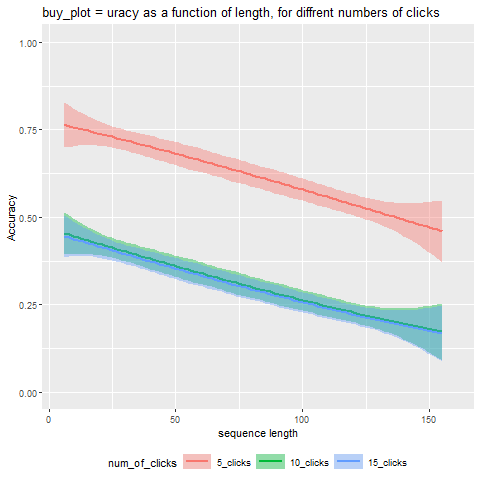

In [35]:
%%R
# print the plot
buy_plot

R[write to console]: `geom_smooth()` using method = 'loess' and formula 'y ~ x'



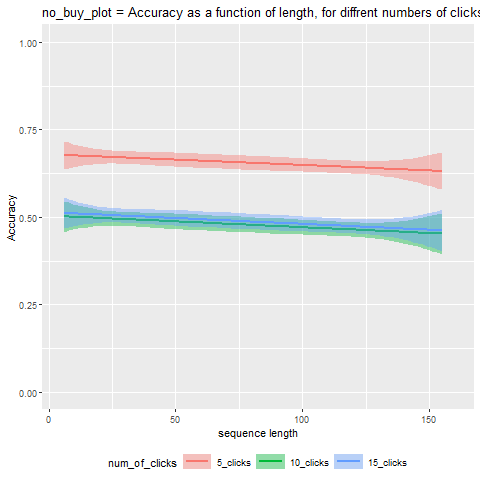

In [36]:
%%R

# print the plot
no_buy_plot